# ENPM 673 Project 4
## Diane Ngo

Imports the necessary libraries for Project 4, Convolutional Neural Network. The project will classify nine different types of fish: gilt head bream, red sea bream, sea bass, red mullet, horse mackerel, black sea sprat, striped red mullet, trout, and shrimp.

In [7]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
print("Tensorflow version:", tf.__version__)
print("# GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.test.is_gpu_available())
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import PIL
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing import image_dataset_from_directory
# from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras import optimizers



# tf.executing_eagerly()

Tensorflow version: 2.4.1
# GPUs Available:  1
True


In [3]:
filenames = os.listdir("Fish_Dataset")
# Successfully lists the director and all images
for root, dirs, files in os.walk("Fish_Dataset"):
    path = root.split(os.sep)
    print((len(path)-1)* '---',  os.path.basename(root))
#     for file in files:
#         print(len(path)*'---', file)

 Fish_Dataset
--- Black Sea Sprat
--- Gilt-Head Bream
--- Hourse Mackerel
--- Red Mullet
--- Red Sea Bream
--- Sea Bass
--- Shrimp
--- Striped Red Mullet
--- Trout


### Get the path for the dataset, delete the ground truth folders because they aren't used
Note that you don't need to run this cell if you are using the UNZIPPED file from google drive with my custom directory (no ground truths, merged fish name folder)

In [119]:
import pathlib
import shutil

print(os.listdir())
cwd = os.getcwd()
# print the current directory
print("Current working directory is:", cwd)

# shutil.rmtree
data_dir = os.path.abspath("Fish_Dataset")
print(os.listdir(data_dir))
data_1 = os.path.abspath("Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream GT")
try:
    shutil.rmtree(data_1)
except:
    print("Can't delete gilt head bream")
data_2 = os.path.abspath("Fish_Dataset/Red Sea Bream/Red Sea Bream GT")
try:
    shutil.rmtree(data_2)
except:
    print("Can't delete red sea bream")
data_3 = os.path.abspath("Fish_Dataset/Sea Bass/Sea Bass GT")
try:
    shutil.rmtree(data_3)
except:
    print("Can't delete sea bass")
data_4 = os.path.abspath("Fish_Dataset/Red Mullet/Red Mullet GT")
try:
    shutil.rmtree(data_4)
except:
    print("Can't delete red mullet")
data_5 = os.path.abspath("Fish_Dataset/Trout/Trout GT")
try:
    shutil.rmtree(data_5)
except:
    print("Can't delete trout")
data_6 = os.path.abspath("Fish_Dataset/Hourse Mackerel/Hourse Mackerel GT")
try:
    shutil.rmtree(data_6)
except:
    print("Can't delete hourse mackeral")    
data_7 = os.path.abspath("Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT")
try:
    shutil.rmtree(data_7)
except:
    print("Can't delete black sea sprat")
data_8 = os.path.abspath("Fish_Dataset/Striped Red Mullet/Striped Red Mullet GT")
try:
    shutil.rmtree(data_8)
except:
    print("Can't delete striped red mullet")
data_9 = os.path.abspath("Fish_Dataset/Shrimp/Shrimp GT")
try:
    shutil.rmtree(data_9)
except: 
    print("Can't delete shrimp")

Define the batch size, image dimensions, and split the data with 80% training, 20% validation. The training dataset and validation dataset are defined below.

Functions to check for corrupt files, deletes files if corrupt. ONLY RUN THIS IF YOU AREN'T USING THE ZIP FILE FROM GOOGLE DRIVE. This is for the original dataset. 

In [139]:
import PIL.Image
print("="*50)
# print(os.listdir("Fish_Dataset/Black Sea Sprat/"))
print("BLACK SEA SPRAT")
for filename in os.listdir("Fish_Dataset/Black Sea Sprat/"):
    if filename.endswith('.png'):
        try:
            img = PIL.Image.open('Fish_Dataset/Black Sea Sprat/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename, "...removing") # print out the names of corrupt files[]
            os.remove(filename)
print("="*50)

# print(os.listdir("Fish_Dataset/Gilt-Head Bream/"))
print("GILT HEAD BREAM")
for filename in os.listdir("Fish_Dataset/Gilt-Head Bream/"):
    if filename.endswith('.png'):
        try:
            img = PIL.Image.open('Fish_Dataset/Gilt-Head Bream/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename, "...removing") # print out the names of corrupt files
            try:
                os.remove(filename)
            except OSError:
                pass
print("="*50)
# print(os.listdir("Fish_Dataset/Hourse Mackerel/"))
print("HOURSE MACKERAL")
for filename in os.listdir("Fish_Dataset/Hourse Mackerel/"):
    if filename.endswith('.png'):
        try:
            img = PIL.Image.open('Fish_Dataset/Hourse Mackerel/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename, "...removing") # print out the names of corrupt files
            try:
                os.remove(filename)
            except OSError:
                pass
print("="*50)
# print(os.listdir("Fish_Dataset/Hourse Mackerel/"))
print("RED MULLET")
for filename in os.listdir("Fish_Dataset/Red Mullet/"):
    if filename.endswith('.png'):
        try:
            img = PIL.Image.open('Fish_Dataset/Red Mullet/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename, "...removing") # print out the names of corrupt files
            try:
                os.remove(filename)
            except OSError:
                pass
print("="*50)
print("RED SEA BREAM")
for filename in os.listdir("Fish_Dataset/Red Sea Bream/"):
    if filename.endswith('.png'):
        try:
            img = PIL.Image.open('Fish_Dataset/Red Sea Bream/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename, "...removing") # print out the names of corrupt files
            try:
                os.remove(filename)
            except OSError:
                pass
print("="*50)
print("SEA BASS")
for filename in os.listdir("Fish_Dataset/Sea Bass/"):
    if filename.endswith('.png'):
        try:
            img = PIL.Image.open('Fish_Dataset/Sea Bass/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename, "...removing") # print out the names of corrupt files
            try:
                os.remove(filename)
            except OSError:
                pass
print("="*50)
print("SHRIMP")
for filename in os.listdir("Fish_Dataset/Shrimp/"):
    if filename.endswith('.png'):
        try:
            img = PIL.Image.open('Fish_Dataset/Shrimp/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename, "...removing") # print out the names of corrupt files
            try:
                os.remove(filename)
            except OSError:
                pass
print("="*50)
print("STRIPED RED MULLET")
for filename in os.listdir("Fish_Dataset/Striped Red Mullet/"):
    if filename.endswith('.png'):
        try:
            img = PIL.Image.open('Fish_Dataset/Striped Red Mullet/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename, "...removing") # print out the names of corrupt files
            try:
                os.remove(filename)
            except OSError:
                pass
print("="*50)
print("TROUT")
for filename in os.listdir("Fish_Dataset/Trout/"):
    if filename.endswith('.png'):
        try:
            img = PIL.Image.open('Fish_Dataset/Trout/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename, "...removing") # print out the names of corrupt files
            try:
                os.remove(filename)
            except OSError:
                pass

# print("Deleted %d images" % num_skipped)

BLACK SEA SPRAT
GILT HEAD BREAM
HOURSE MACKERAL
RED MULLET
RED SEA BREAM
SEA BASS
SHRIMP
STRIPED RED MULLET
TROUT


Create training dataset and validation dataset by splitting 80:20

In [16]:
data_dir = os.path.abspath("Fish_Dataset")
print(data_dir)
batch_size = 32
img_height = 128
img_width = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print("Class names")
class_names = train_ds.class_names
print(class_names)
print(type(train_ds))


F:\UMD Masters\Spring 2021\ENPM673 Perception for Autonomous Robots\Projects\Project 4\P4_CNN\Fish_Dataset
Found 9000 files belonging to 9 classes.
Using 7200 files for training.
Found 9000 files belonging to 9 classes.
Using 1800 files for validation.
Class names
['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


Take 9 random samples from the dataset and plot them alongside their labels.

<ipython-input-37-5dd085f1e04e>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


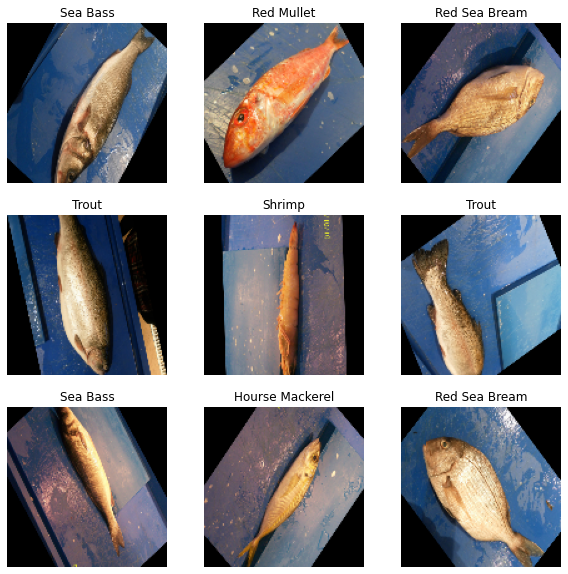

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


# 10 layer test

In [46]:
# Prepare data and keeps in memory
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 9
# 1./127.5, offset=-1
#### BACKUP ORIGINAL MODEL, FOR TESTING, does not follow vgg 16
### WORKING
# model = tf.keras.Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

# Create model for CNN
model = tf.keras.Sequential([
    # Rescale to [-1, 1]
    layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1),
    layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(num_classes)
])

# Compile model
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Fit model (train it)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    verbose=1
)


print(model.summary())

Epoch 1/10
225/225 [==============================] - 13s 54ms/step - loss: 1.8319 - accuracy: 0.3045 - val_loss: 0.6820 - val_accuracy: 0.7733
Epoch 2/10
225/225 [==============================] - 12s 53ms/step - loss: 0.4844 - accuracy: 0.8336 - val_loss: 0.2905 - val_accuracy: 0.9172
Epoch 3/10
225/225 [==============================] - 12s 52ms/step - loss: 0.1818 - accuracy: 0.9371 - val_loss: 0.2116 - val_accuracy: 0.9417
Epoch 4/10
225/225 [==============================] - 11s 50ms/step - loss: 0.1102 - accuracy: 0.9635 - val_loss: 0.1624 - val_accuracy: 0.9494
Epoch 5/10
225/225 [==============================] - 12s 52ms/step - loss: 0.0614 - accuracy: 0.9788 - val_loss: 0.1798 - val_accuracy: 0.9422
Epoch 6/10
225/225 [==============================] - 11s 51ms/step - loss: 0.0775 - accuracy: 0.9755 - val_loss: 0.1884 - val_accuracy: 0.9450
Epoch 7/10
225/225 [==============================] - 12s 52ms/step - loss: 0.0716 - accuracy: 0.9785 - val_loss: 0.1236 - val_accuracy:

Plot the data accuracy and loss

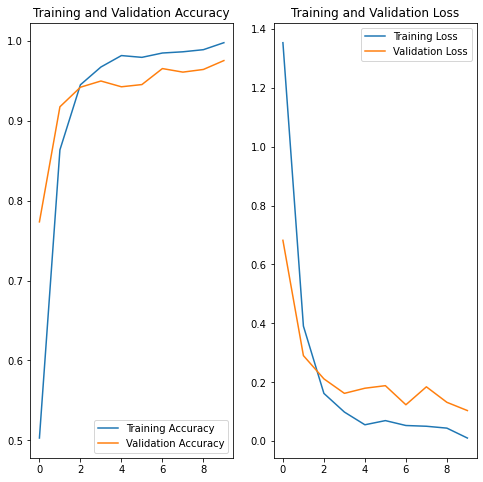

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 13 layer test

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 9

model = tf.keras.Sequential([
# VGG-16 Architecture
    # Rescale to [-1, 1]
    layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1),
    layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Flatten(),
    layers.Dense(4096/2, activation='relu'),
    layers.Dense(4096/2, activation='relu'),
    layers.Dense(1000)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    verbose=1
)

print(model.summary())

Epoch 1/10
225/225 [==============================] - 6s 22ms/step - loss: 2.9274 - accuracy: 0.1139 - val_loss: 2.2188 - val_accuracy: 0.1122
Epoch 2/10
225/225 [==============================] - 5s 21ms/step - loss: 2.0973 - accuracy: 0.1708 - val_loss: 1.4871 - val_accuracy: 0.4183
Epoch 3/10
225/225 [==============================] - 5s 21ms/step - loss: 1.1910 - accuracy: 0.5494 - val_loss: 0.7592 - val_accuracy: 0.7222
Epoch 4/10
225/225 [==============================] - 5s 21ms/step - loss: 0.6167 - accuracy: 0.7832 - val_loss: 0.4051 - val_accuracy: 0.8589
Epoch 5/10
225/225 [==============================] - 5s 21ms/step - loss: 0.3221 - accuracy: 0.8857 - val_loss: 0.4160 - val_accuracy: 0.8667
Epoch 6/10
225/225 [==============================] - 5s 21ms/step - loss: 0.2111 - accuracy: 0.9251 - val_loss: 0.3015 - val_accuracy: 0.8900
Epoch 7/10
225/225 [==============================] - 5s 21ms/step - loss: 0.1725 - accuracy: 0.9410 - val_loss: 0.3498 - val_accuracy: 0.8989

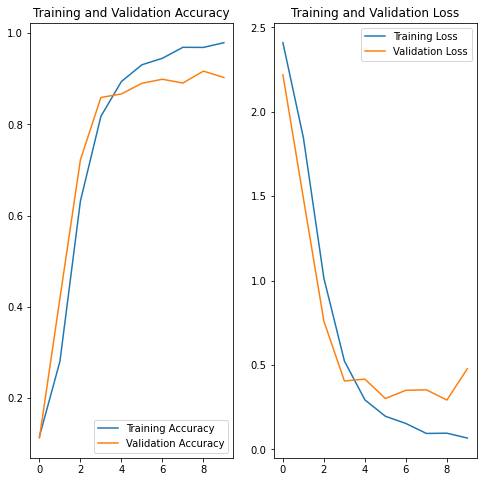

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# VGG-16 (16 layer)

In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 9
# 1./127.5, offset=-1
#### BACKUP ORIGINAL MODEL, FOR TESTING, does not follow vgg 16
### WORKING
# model = tf.keras.Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

model = tf.keras.Sequential([
# VGG-16 Architecture
    # Rescale to [-1, 1]
#     1./127.5, offset=-1 
#     [0, 1] 1./255
#     layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1),
    layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1000)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
    train_ds,
#     batch_size=batch_size,
    epochs=10,
    validation_data=val_ds,
    verbose=1
)

print(model.summary())

Epoch 1/10
225/225 [==============================] - 6s 22ms/step - loss: 3.3550 - accuracy: 0.1159 - val_loss: 1.9376 - val_accuracy: 0.2361
Epoch 2/10
225/225 [==============================] - 4s 20ms/step - loss: 1.7975 - accuracy: 0.3049 - val_loss: 1.2059 - val_accuracy: 0.5772
Epoch 3/10
225/225 [==============================] - 5s 21ms/step - loss: 1.0878 - accuracy: 0.5979 - val_loss: 0.6752 - val_accuracy: 0.7544
Epoch 4/10
225/225 [==============================] - 5s 21ms/step - loss: 0.6265 - accuracy: 0.7685 - val_loss: 0.3746 - val_accuracy: 0.8611
Epoch 5/10
225/225 [==============================] - 5s 21ms/step - loss: 0.4116 - accuracy: 0.8499 - val_loss: 0.3412 - val_accuracy: 0.8856
Epoch 6/10
225/225 [==============================] - 5s 20ms/step - loss: 0.3037 - accuracy: 0.8908 - val_loss: 0.2882 - val_accuracy: 0.9094
Epoch 7/10
225/225 [==============================] - 5s 21ms/step - loss: 0.2258 - accuracy: 0.9219 - val_loss: 0.2135 - val_accuracy: 0.9339

Plot the data accuracy and loss

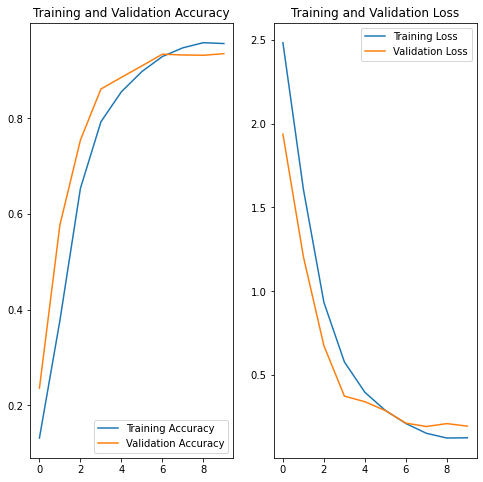

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# VGG-16 With Batch Size 64, 20 epochs

In [35]:
batch_size = 64
img_height = 128
img_width = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 9

model = tf.keras.Sequential([
# VGG-16 Architecture
    # Rescale to [-1, 1]
    layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1),
    layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.Conv2D(128, 3, activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1000)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    verbose=1
)

print(model.summary())

Found 9000 files belonging to 9 classes.
Using 7200 files for training.
Found 9000 files belonging to 9 classes.
Using 1800 files for validation.
Epoch 1/20
113/113 [==============================] - 43s 349ms/step - loss: 3.1572 - accuracy: 0.1032 - val_loss: 2.2153 - val_accuracy: 0.1122
Epoch 2/20
113/113 [==============================] - 4s 35ms/step - loss: 2.2254 - accuracy: 0.1057 - val_loss: 2.2074 - val_accuracy: 0.1122
Epoch 3/20
113/113 [==============================] - 4s 34ms/step - loss: 2.0506 - accuracy: 0.1804 - val_loss: 1.6792 - val_accuracy: 0.3839
Epoch 4/20
113/113 [==============================] - 4s 34ms/step - loss: 1.3418 - accuracy: 0.4851 - val_loss: 1.0325 - val_accuracy: 0.6144
Epoch 5/20
113/113 [==============================] - 4s 34ms/step - loss: 0.8883 - accuracy: 0.6743 - val_loss: 0.7044 - val_accuracy: 0.7311
Epoch 6/20
113/113 [==============================] - 4s 34ms/step - loss: 0.6558 - accuracy: 0.7548 - val_loss: 0.4629 - val_accuracy: 0

Plot the data accuracy and loss

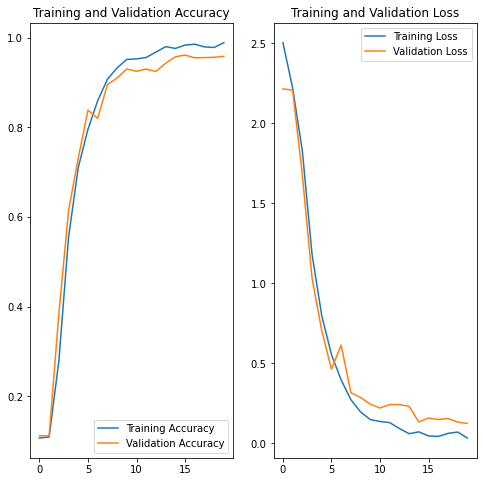

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()